## Exploratory Data Analysis (EDA)

In [70]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import missingno
#install plotly from command line
#conda install -c plotly plotly_express


In [71]:
#Pandas set max columns so you can see everything!
pd.set_option('display.max_columns', None)
#OR
#pd.set_option('max_columns', 100)

In [72]:
df_train = pd.read_csv('phase1export.csv')

## What is lm plot?

In [73]:
df_train.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


## Separate Categorical data from Nuermic Data

In [74]:
#Separate numeric and object data types
numeric_values = df_train.columns[df_train.dtypes != 'object']
categorical_values = df_train.columns[df_train.dtypes == 'object']
print(numeric_values)
print(categorical_values)

Index(['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd',
       'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold',
       'SalePrice'],
      dtype='object')
Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation',

In [75]:
df_train[numeric_values].dtypes

Order                int64
PID                  int64
MS SubClass          int64
Lot Frontage       float64
Lot Area             int64
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Mas Vnr Area       float64
BsmtFin SF 1       float64
BsmtFin SF 2       float64
Bsmt Unf SF        float64
Total Bsmt SF      float64
1st Flr SF           int64
2nd Flr SF           int64
Low Qual Fin SF      int64
Gr Liv Area          int64
Bsmt Full Bath     float64
Bsmt Half Bath     float64
Full Bath            int64
Half Bath            int64
Bedroom AbvGr        int64
Kitchen AbvGr        int64
TotRms AbvGrd        int64
Fireplaces           int64
Garage Yr Blt      float64
Garage Cars        float64
Garage Area        float64
Wood Deck SF         int64
Open Porch SF        int64
Enclosed Porch       int64
3Ssn Porch           int64
Screen Porch         int64
Pool Area            int64
Misc Val             int64
Mo Sold              int64
Y

In [76]:
#Get a count of missing values using the sum of the isnull function
df_train[numeric_values].isnull().sum().sort_values(ascending=False)

Lot Frontage       490
Garage Yr Blt      159
Mas Vnr Area        23
Bsmt Half Bath       2
Bsmt Full Bath       2
Garage Cars          1
BsmtFin SF 1         1
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Garage Area          1
Lot Area             0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Low Qual Fin SF      0
MS SubClass          0
PID                  0
1st Flr SF           0
2nd Flr SF           0
SalePrice            0
Gr Liv Area          0
Open Porch SF        0
Mo Sold              0
Misc Val             0
Pool Area            0
Screen Porch         0
3Ssn Porch           0
Enclosed Porch       0
Wood Deck SF         0
Yr Sold              0
Fireplaces           0
TotRms AbvGrd        0
Kitchen AbvGr        0
Bedroom AbvGr        0
Half Bath            0
Full Bath            0
Order                0
dtype: int64

In [77]:
#Get a count of missing values using the sum of the isnull function
df_train[categorical_values].isnull().sum().sort_values(ascending=False)

Pool QC           2917
Misc Feature      2824
Alley             2732
Fence             2358
Fireplace Qu      1422
Garage Cond        159
Garage Qual        159
Garage Finish      159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
BsmtFin Type 1      80
Bsmt Qual           80
Bsmt Cond           80
Mas Vnr Type        23
Electrical           1
Condition 2          0
Condition 1          0
Neighborhood         0
Land Slope           0
Bldg Type            0
Land Contour         0
Lot Config           0
Utilities            0
Roof Style           0
Lot Shape            0
Street               0
House Style          0
Sale Condition       0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Exter Qual           0
Exter Cond           0
Foundation           0
Sale Type            0
Heating              0
Heating QC           0
Central Air          0
Kitchen Qual         0
Functional           0
Paved Drive          0
MS Zoning            0
dtype: int6

In [78]:
#Get the length of the data frame
len(df_train)

2930

In [79]:
#Calculate the percentage of missing data
df_train[numeric_values].isnull().sum().sort_values(ascending=False)/len(df_train)

Lot Frontage       0.167235
Garage Yr Blt      0.054266
Mas Vnr Area       0.007850
Bsmt Half Bath     0.000683
Bsmt Full Bath     0.000683
Garage Cars        0.000341
BsmtFin SF 1       0.000341
BsmtFin SF 2       0.000341
Bsmt Unf SF        0.000341
Total Bsmt SF      0.000341
Garage Area        0.000341
Lot Area           0.000000
Overall Qual       0.000000
Overall Cond       0.000000
Year Built         0.000000
Year Remod/Add     0.000000
Low Qual Fin SF    0.000000
MS SubClass        0.000000
PID                0.000000
1st Flr SF         0.000000
2nd Flr SF         0.000000
SalePrice          0.000000
Gr Liv Area        0.000000
Open Porch SF      0.000000
Mo Sold            0.000000
Misc Val           0.000000
Pool Area          0.000000
Screen Porch       0.000000
3Ssn Porch         0.000000
Enclosed Porch     0.000000
Wood Deck SF       0.000000
Yr Sold            0.000000
Fireplaces         0.000000
TotRms AbvGrd      0.000000
Kitchen AbvGr      0.000000
Bedroom AbvGr      0

In [80]:
#Calculate the percentage of missing data
df_train[categorical_values].isnull().sum().sort_values(ascending=False)/len(df_train)

Pool QC           0.995563
Misc Feature      0.963823
Alley             0.932423
Fence             0.804778
Fireplace Qu      0.485324
Garage Cond       0.054266
Garage Qual       0.054266
Garage Finish     0.054266
Garage Type       0.053584
Bsmt Exposure     0.028328
BsmtFin Type 2    0.027645
BsmtFin Type 1    0.027304
Bsmt Qual         0.027304
Bsmt Cond         0.027304
Mas Vnr Type      0.007850
Electrical        0.000341
Condition 2       0.000000
Condition 1       0.000000
Neighborhood      0.000000
Land Slope        0.000000
Bldg Type         0.000000
Land Contour      0.000000
Lot Config        0.000000
Utilities         0.000000
Roof Style        0.000000
Lot Shape         0.000000
Street            0.000000
House Style       0.000000
Sale Condition    0.000000
Roof Matl         0.000000
Exterior 1st      0.000000
Exterior 2nd      0.000000
Exter Qual        0.000000
Exter Cond        0.000000
Foundation        0.000000
Sale Type         0.000000
Heating           0.000000
H

In [81]:
##Write results out to 
submission = df_train

submission.to_csv("clean.csv", index = False)

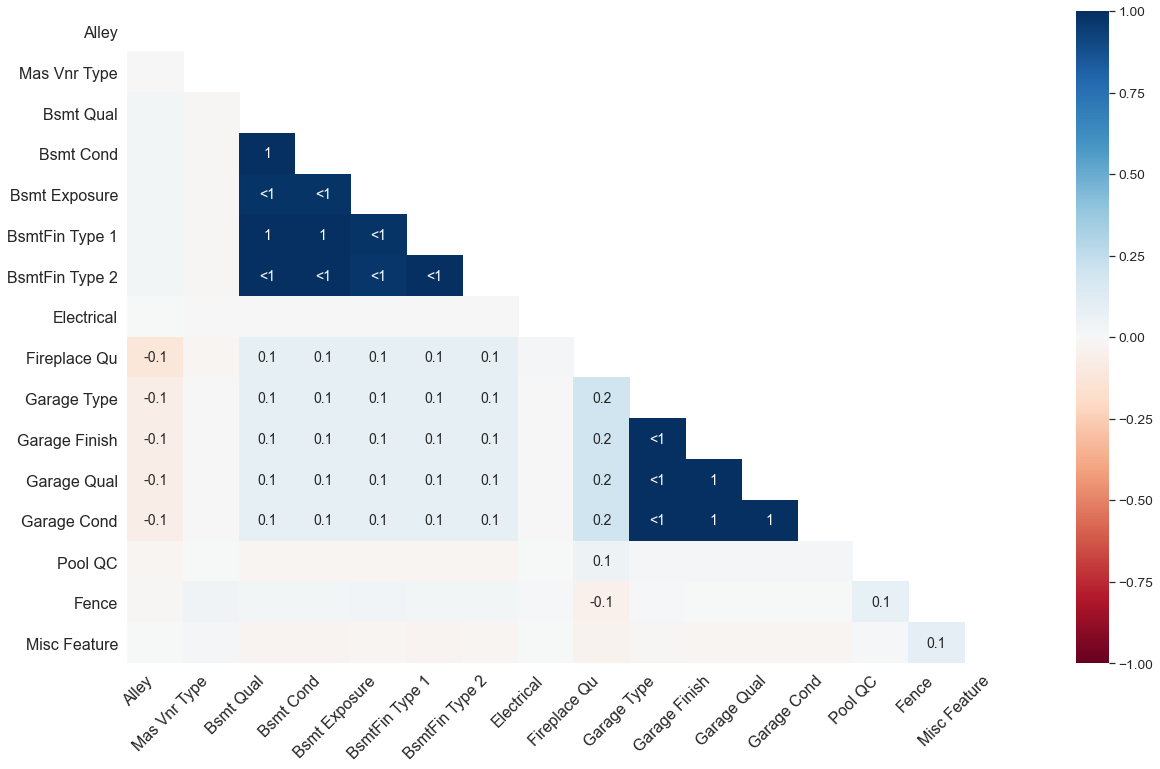

In [82]:
#https://coderzcolumn.com/tutorials/data-science/missingno-visualize-missing-data-in-python
#missingno.matrix(df_train[categorical_values])
#missingno.bar(df_train[categorical_values])
missingno.heatmap(df_train[categorical_values])

In [83]:
df_train['MS Zoning'].value_counts()

RL         2273
RM          462
FV          139
RH           27
C (all)      25
A (agr)       2
I (all)       2
Name: MS Zoning, dtype: int64

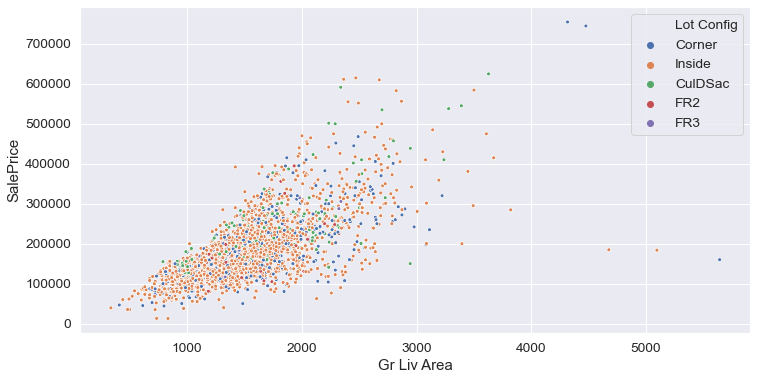

In [84]:
#use the hue parameter to add in object type variables to see how they relate
sns.scatterplot(x="Gr Liv Area", y="SalePrice", hue='Lot Config', s=15, data=df_train);

In [85]:
#adding () to describe gives statistical values (without the parentheses you don't get the stats...just a list of values)
df_train['SalePrice'].describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

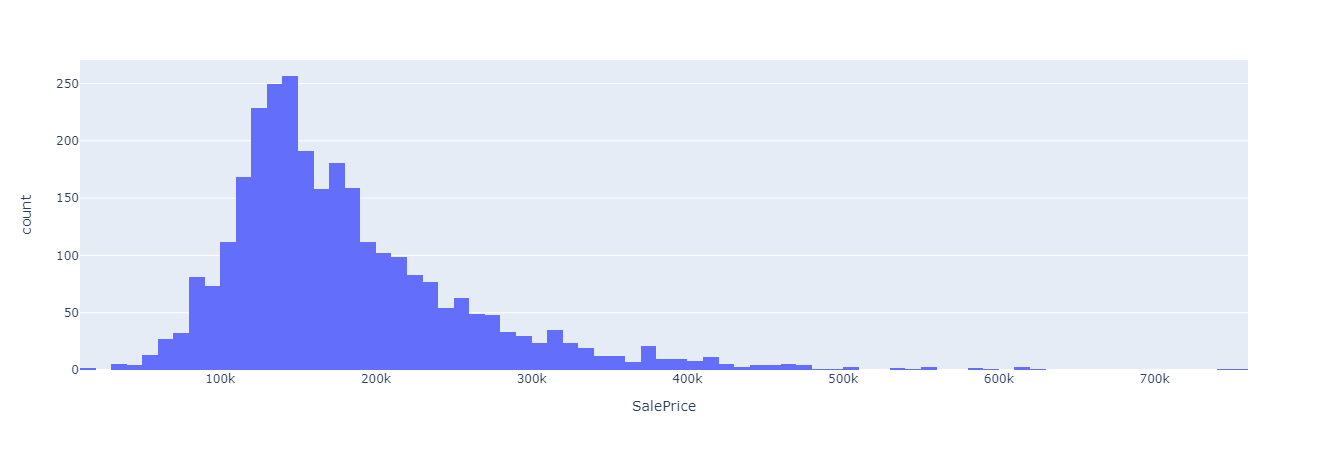

In [86]:
#import plotly.express as px
#df = px.data.tips()
fig = px.histogram(df_train, x="SalePrice")
fig.show()


In [88]:
#Large positive skew
#Check the skew on SalePrice
df_train['SalePrice'].skew()

1.7435000757376466

In [89]:
#Peakedness
#Check Kurtosis on SalePrice
#Kurtosis of 3 is normal distribution
df_train['SalePrice'].kurtosis()

5.118899951130896

In [68]:
#Large positive skew
#Check the skew on SalePrice
df_train['SalePrice'].skew()

1.7435000757376466

In [27]:
#Peakedness
#Check Kurtosis on SalePrice
#Kurtosis of 3 is normal distribution
df_train['SalePrice'].kurtosis()

5.118899951130896

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021D51B5DDC0>,
      dtype=object)

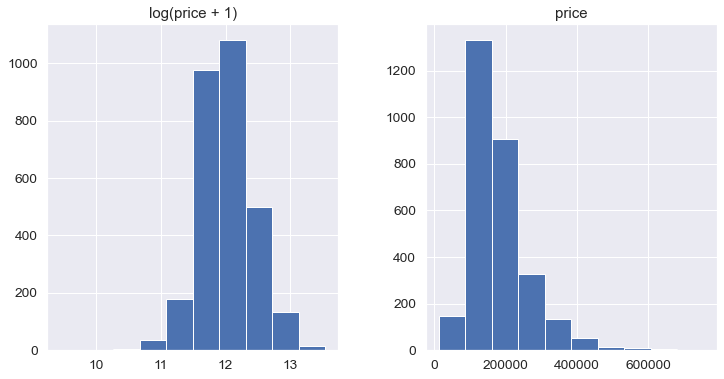

In [91]:
#Handy to check histograms side by side (log vs no log)
#https://www.kaggle.com/apapiu/regularized-linear-models
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"price":df_train["SalePrice"], "log(price + 1)":np.log1p(df_train["SalePrice"])})
prices.hist()

In [28]:
df_train['SalePrice'].describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [29]:
##Write results out to csv for kaggle
export = df_train

export.to_csv("phase2export.csv", index = False)

In [30]:
#GrLivArea: Above grade (ground) living area square feet
df_train['Gr Liv Area'].describe()

count    2930.000000
mean     1499.690444
std       505.508887
min       334.000000
25%      1126.000000
50%      1442.000000
75%      1742.750000
max      5642.000000
Name: Gr Liv Area, dtype: float64

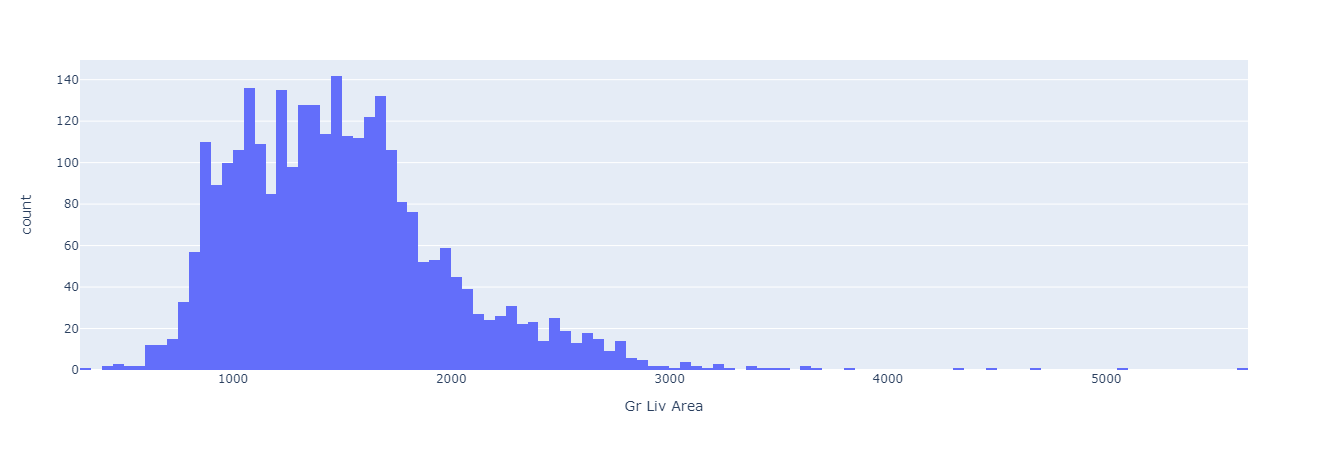

In [31]:
#Skewness and Kurtosis
#
#https://towardsdatascience.com/skewness-kurtosis-simplified-1338e094fc85
#Kurtosis can be indicative of outliers
import plotly.express as px
#df = px.data.tips()
fig = px.histogram(df_train, x="Gr Liv Area")
fig.show()

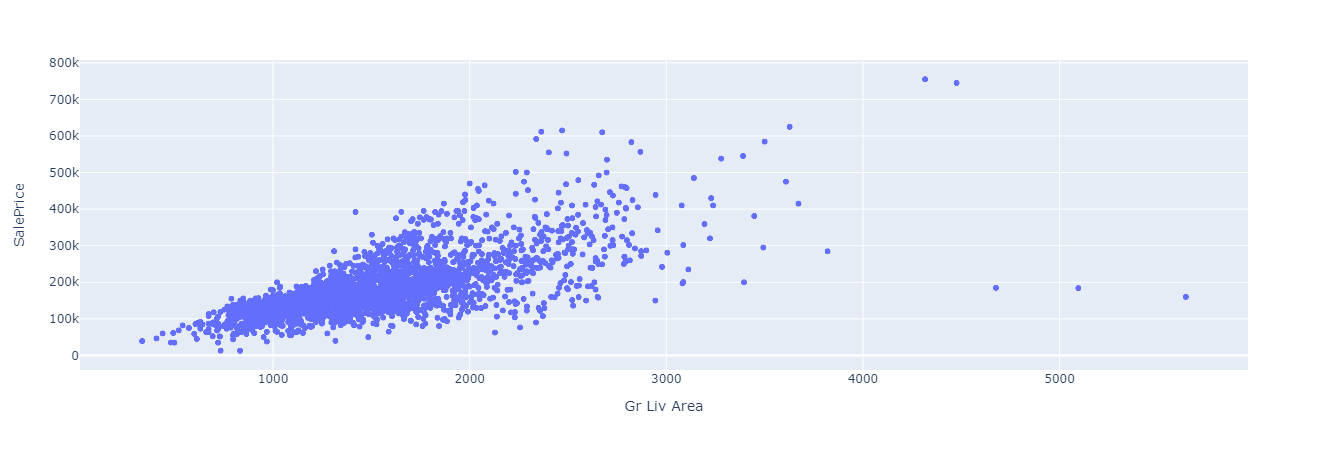

In [32]:
#Strong linear relationship between living area and saleprice
fig = px.scatter(df_train, x='Gr Liv Area', y='SalePrice')
fig.show()

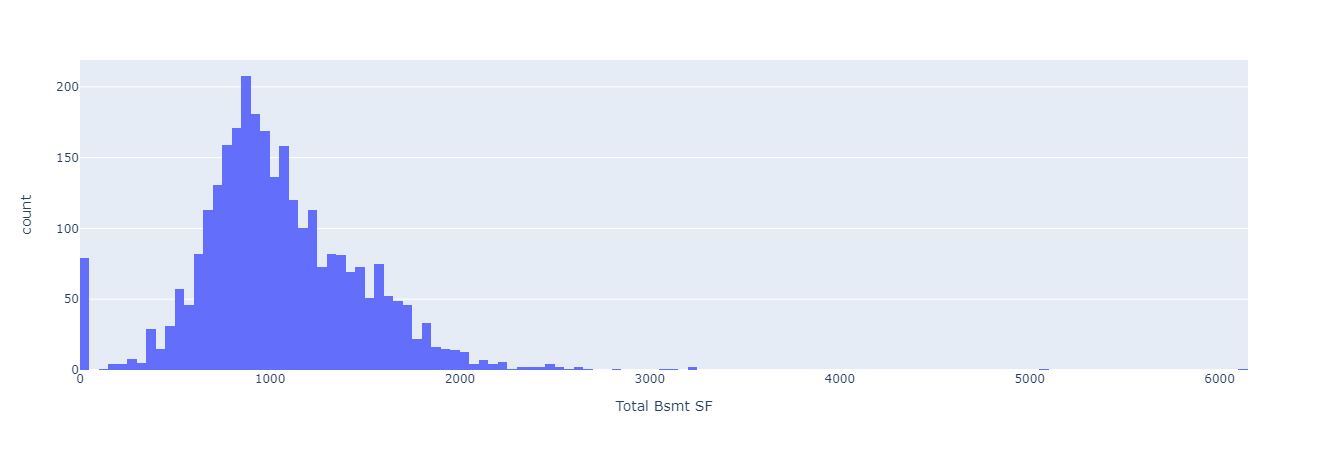

In [33]:
fig = px.histogram(df_train, x="Total Bsmt SF")
fig.show()

In [34]:
df_train['Total Bsmt SF'].skew()

1.156204321548864

In [35]:
#seems that you can use .kurt or .kurtosis
df_train['Total Bsmt SF'].kurtosis()

9.135612333071672

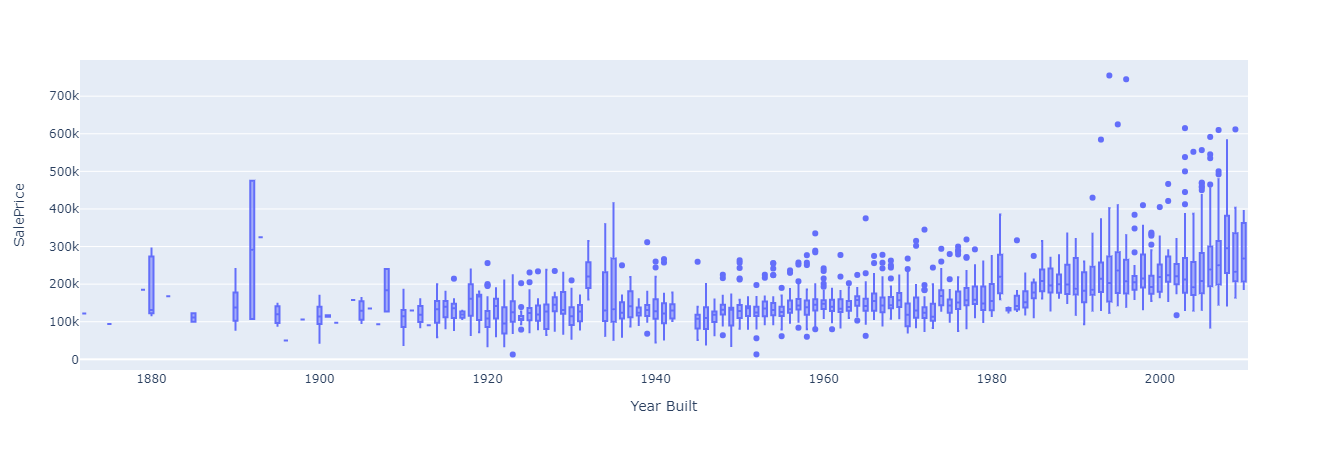

In [36]:
fig = px.box(df_train, x='Year Built', y='SalePrice')
fig.show()

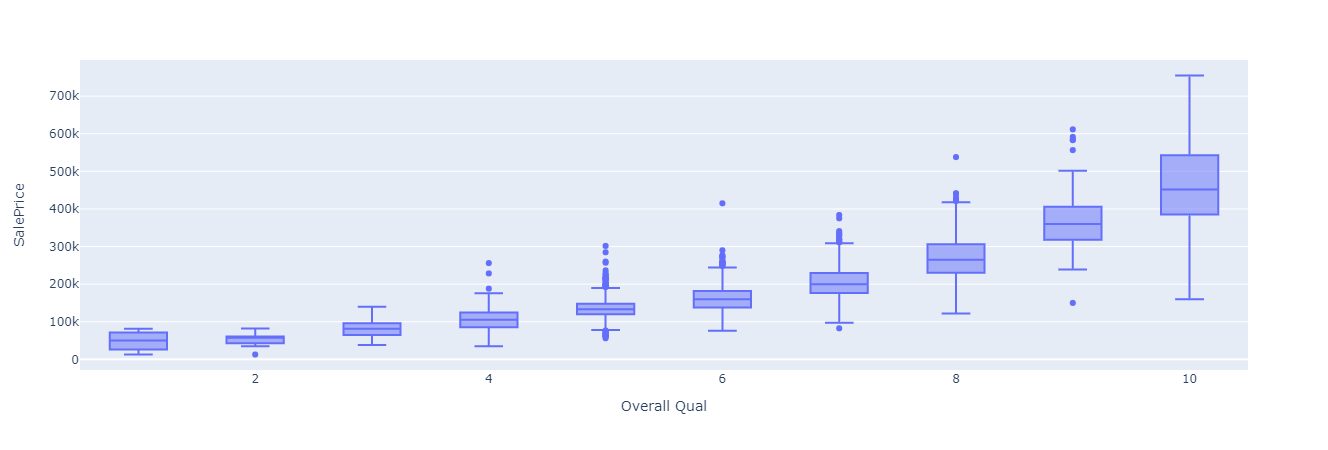

In [37]:
#OverallQual OverallCond
fig = px.box(df_train, x='Overall Qual', y='SalePrice')
fig.show()

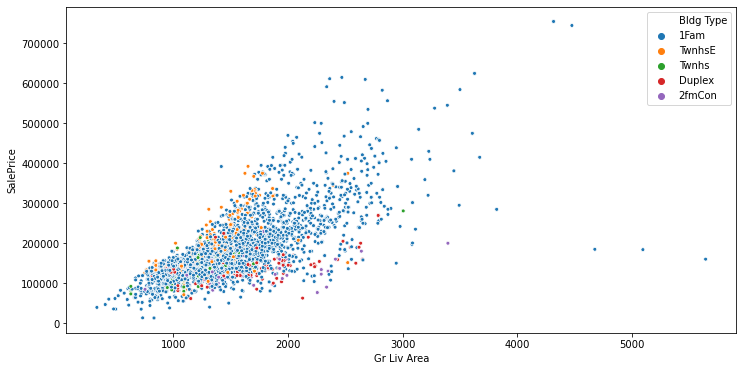

In [39]:
sns.scatterplot(x="Gr Liv Area", y="SalePrice", hue="Bldg Type", s=15, data=df_train);

In [40]:
#Correlation Matrix
corrmatrix = df_train.corr()

In [41]:
corrmatrix

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
Order,1.000000,0.173593,0.011797,-0.007034,0.031354,-0.048500,-0.011054,-0.052319,-0.075566,-0.030907,-0.032321,-0.002773,0.005780,-0.028719,-0.013201,-0.000417,0.013589,-0.009342,-0.042539,0.024978,-0.044985,-0.039749,0.015424,-0.017685,0.002612,-0.019156,-0.051160,-0.036185,-0.035435,-0.011292,0.016355,0.027908,-0.024975,0.004307,0.052518,-0.006083,0.133365,-0.975993,-0.031408
PID,0.173593,1.000000,-0.001281,-0.096918,0.034868,-0.263147,0.104451,-0.343388,-0.157111,-0.229283,-0.098375,-0.001145,-0.087707,-0.189642,-0.141902,-0.003289,0.056940,-0.107579,-0.037759,0.004328,-0.171431,-0.166636,0.006345,0.076470,-0.068981,-0.108056,-0.256829,-0.237484,-0.210606,-0.051135,-0.071311,0.162519,-0.024894,-0.025735,-0.002845,-0.008260,-0.050455,0.009579,-0.246521
MS SubClass,0.011797,-0.001281,1.000000,-0.420135,-0.204613,0.039419,-0.067349,0.036579,0.043397,0.002730,-0.060075,-0.070946,-0.130421,-0.219445,-0.247828,0.304237,0.025765,0.068061,0.013701,-0.003329,0.134631,0.175879,-0.019208,0.257698,0.031898,-0.049955,0.088754,-0.045883,-0.103239,-0.017310,-0.014823,-0.022866,-0.037956,-0.050614,-0.003434,-0.029254,0.000350,-0.017905,-0.085092
Lot Frontage,-0.007034,-0.096918,-0.420135,1.000000,0.491313,0.212042,-0.074448,0.121562,0.091712,0.222407,0.215583,0.045999,0.116743,0.353773,0.457391,0.029187,0.005249,0.383822,0.108915,-0.024724,0.184521,0.041880,0.240442,0.005407,0.353137,0.257255,0.076306,0.308706,0.358505,0.120084,0.163040,0.012758,0.028564,0.076666,0.173947,0.044476,0.011085,-0.007547,0.357318
Lot Area,0.031354,0.034868,-0.204613,0.491313,1.000000,0.097188,-0.034759,0.023258,0.021682,0.126830,0.191555,0.083150,0.023658,0.253589,0.332235,0.032996,0.000812,0.285599,0.125877,0.026903,0.127433,0.035497,0.136569,-0.020301,0.216597,0.256989,-0.008952,0.179512,0.212822,0.157212,0.103760,0.021868,0.016243,0.055044,0.093775,0.069188,0.003859,-0.023085,0.266549
Overall Qual,-0.048500,-0.263147,0.039419,0.212042,0.097188,1.000000,-0.094812,0.597027,0.569609,0.429418,0.284118,-0.041287,0.270058,0.547294,0.477837,0.241402,-0.048680,0.570556,0.167858,-0.041647,0.522263,0.268853,0.063291,-0.159744,0.380693,0.393007,0.570569,0.599545,0.563503,0.255663,0.298412,-0.140332,0.018240,0.041615,0.030399,0.005179,0.031103,-0.020719,0.799262
Overall Cond,-0.011054,0.104451,-0.067349,-0.074448,-0.034759,-0.094812,1.000000,-0.368773,0.047680,-0.135340,-0.050935,0.041134,-0.136819,-0.173344,-0.157052,0.006218,0.009175,-0.115643,-0.042766,0.084455,-0.214316,-0.088127,-0.006137,-0.086386,-0.089816,-0.031702,-0.326017,-0.181557,-0.153754,0.020344,-0.068934,0.071459,0.043852,0.044055,-0.016787,0.034056,-0.007295,0.031207,-0.101697
Year Built,-0.052319,-0.343388,0.036579,0.121562,0.023258,0.597027,-0.368773,1.000000,0.612095,0.313292,0.279870,-0.027415,0.128998,0.407526,0.310463,0.016828,-0.144282,0.241726,0.211849,-0.030626,0.469406,0.269268,-0.055093,-0.137852,0.111919,0.170672,0.834849,0.537443,0.480131,0.228964,0.198365,-0.374364,0.015803,-0.041436,0.002213,-0.011011,0.014577,-0.013197,0.558426
Year Remod/Add,-0.075566,-0.157111,0.043397,0.091712,0.021682,0.569609,0.047680,0.612095,1.000000,0.196928,0.151790,-0.062129,0.164805,0.297481,0.242108,0.158939,-0.060365,0.316855,0.134387,-0.046292,0.457266,0.211771,-0.021536,-0.142404,0.197528,0.133322,0.652310,0.425403,0.376438,0.217857,0.241748,-0.220383,0.037412,-0.046888,-0.011410,-0.003132,0.018048,0.032652,0.532974
Mas Vnr Area,-0.030907,-0.229283,0.002730,0.222407,0.126830,0.429418,-0.135340,0.313292,0.196928,1.000000,0.301872,-0.016019,0.091668,0

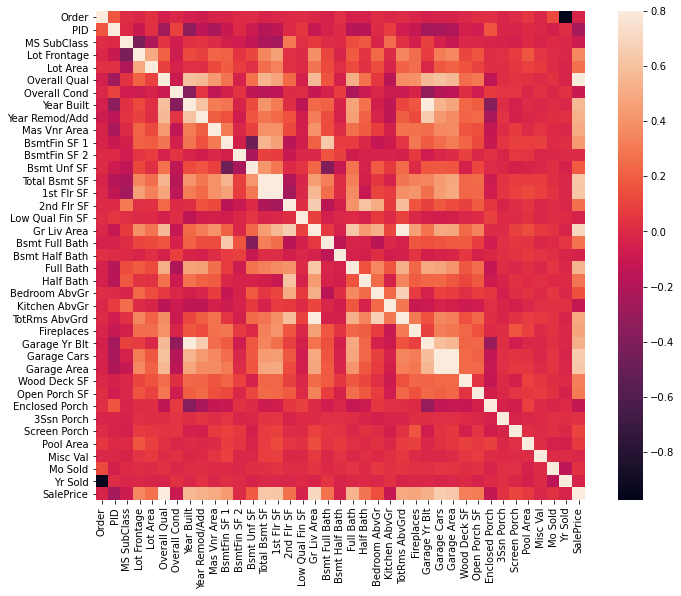

In [44]:
#correlation matrix

corrmatrix = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmatrix, vmax=.8, square=True);

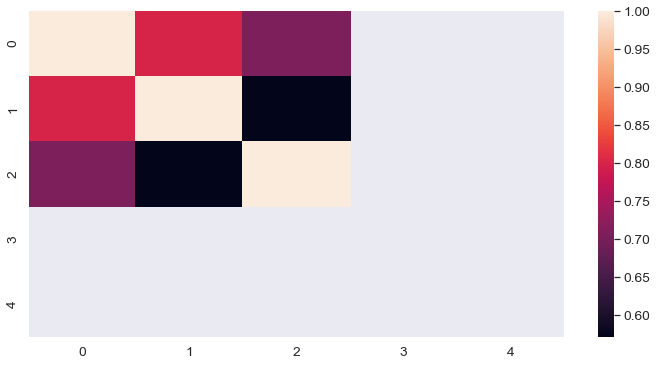

In [99]:
#saleprice correlation matrix
k = 5 #number of variables for heatmap
cols = corrmatrix.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm)#cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 20}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [94]:
cols

Index(['SalePrice', 'Overall Qual', 'Gr Liv Area', 'Garage Cars',
       'Garage Area'],
      dtype='object')

In [90]:
##Write results out to csv for kaggle
export = df_train

export.to_csv("phase2export.csv", index = False)